<a href="https://colab.research.google.com/github/hellojohnkim/mmai823/blob/main/Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
%matplotlib inline


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


2. List the S&P500 companies that have the top 5 highest trailing PE, and the top 5 with highest forward PE.

First, we get list of S&P500 companies and their tickers (stock symbols)

In [ ]:
## scraping wikipedia table to get list of tickers of companies aka constituents

# There are 2 tables on the Wikipedia page, we want the first table
# second table shows the evolution of the changes

components = \
pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')

first_table = components[0]
second_table = components[1]
sp_df = first_table
sp_df.Symbol
sp500_tickers = sp_df.Symbol

In [ ]:
#make sure we have data = 503 symbols
sp500_tickers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 503 entries, 0 to 502
Series name: Symbol
Non-Null Count  Dtype 
--------------  ----- 
503 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [ ]:
#other data we got from wikipedia
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [ ]:
##yahoo finance to call market cap of a stock
yf.Ticker('MSFT').info['marketCap']

3028201504768

In [ ]:
#get PE data for tickers in S&P500


SP500_PE=[]


for ticker in sp500_tickers:
    try:
    #if symbol not in ['INFO', 'AES']:
        ticker=ticker.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(ticker)
        print(ticker,round(ticker_yahoo.info['forwardPE'],2))
        SP500_PE.append(
            {
                "Ticker":ticker,
                "trainlingPE":ticker_yahoo.info['trailingPE'],
                "forwardPE": ticker_yahoo.info['forwardPE']
            }
        )
    except:
        pass

SP500_PE=pd.DataFrame(SP500_PE)

In [ ]:
SP500_PE

,Ticker,trainlingPE,forwardPE
0,AOS,22.111110,18.842957
1,ABT,36.407978,23.227005
2,ABBV,65.738970,14.620605
3,ACN,34.984245,27.858303
4,ADBE,47.337837,27.596258
...,...,...,...
463,YUM,24.697674,21.272728
464,ZBRA,48.611890,19.748579
465,ZBH,25.999998,14.617511
466,ZION,8.832184,8.280172


Companies that have the top 5 highest trailing PE

In [ ]:
# top 5 companies with highest training PE
SP500_PE.sort_values('trainlingPE', ascending=False).head(5)

,Ticker,trainlingPE,forwardPE
392,SJM,12525.00000,12.279412
295,MRK,920.28570,13.200819
5,AMD,332.09436,32.295414
106,CLX,239.69841,23.232307
12,ARE,220.57407,34.827484


Companies that have the top 5 highest forward PE

In [ ]:
# top 5 companies with highest forward PE
SP500_PE.sort_values('forwardPE', ascending=False).head(5)

,Ticker,trainlingPE,forwardPE
138,DLR,45.986668,111.258070
426,UDR,26.134329,70.040000
166,EQIX,85.040700,67.250570
51,AXON,139.276920,66.080290
123,CSGP,91.282610,64.600006


Companies that have the top 5 lowest trailing PE

In [ ]:
# companies with lowest trailing PE
SP500_PE.sort_values('trainlingPE', ascending=True).head(5)

,Ticker,trainlingPE,forwardPE
35,APA,3.202162,5.336937
189,FMC,4.645446,10.466136
205,GM,5.435792,4.377338
429,UAL,5.699620,3.890138
434,VLO,5.822231,11.247287


Companies that have the top 5 lowest forward PE

In [ ]:
# companies with lowest forward PE
SP500_PE.sort_values('forwardPE', ascending=True).head(5)

,Ticker,trainlingPE,forwardPE
429,UAL,5.699620,3.890138
205,GM,5.435792,4.377338
22,AAL,12.628099,4.687117
440,VTRS,8.894040,4.779360
35,APA,3.202162,5.336937


3. Suppose that you want to establish a portfolio among only those S&P 500 companies with the following features:
    a. Market Cap between the 40-60% quantile
    b. Foward PE among the 30-50% quantile

We have PE data. We need to get Market Cap data

In [ ]:
##get market capitalization from yahoo fiance ticker function and put them into a df

SP500_MKTCAP=[]


for ticker in sp500_tickers:
    try:
    #if symbol not in ['INFO', 'AES']:
        ticker=ticker.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(ticker)
        print(ticker,round(ticker_yahoo.info['marketCap']))
        SP500_MKTCAP.append(
            {
                "Ticker":ticker,
                "marketCap":ticker_yahoo.info['marketCap'],
            }
        )
    except:
        pass

SP500_MKTCAP=pd.DataFrame(SP500_MKTCAP)

In [ ]:
SP500_MKTCAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ticker     502 non-null    object
 1   marketCap  502 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ KB


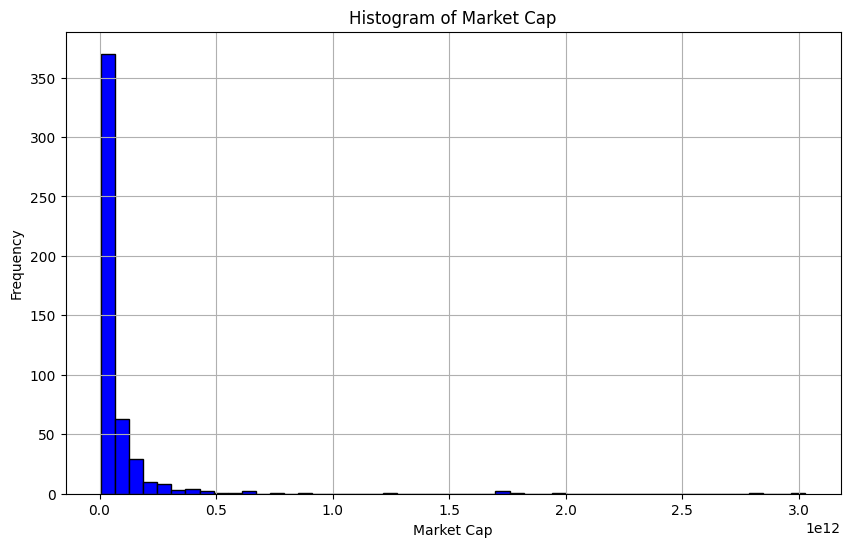

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(SP500_MKTCAP['marketCap'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Market Cap')
plt.xlabel('Market Cap')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Companies with Market Cap between 40-60% quantile

In [ ]:
# companies with market cap between 40-60% quantile
lower_bound = SP500_MKTCAP['marketCap'].quantile(0.4)
upper_bound = SP500_MKTCAP['marketCap'].quantile(0.6)

marketcap_names = SP500_MKTCAP[(SP500_MKTCAP['marketCap'] > lower_bound) & (SP500_MKTCAP['marketCap'] < upper_bound)]
marketcap_names['Ticker']
marketcap_names
#SP500_MKTCAP.query('@lower_bound < marketCap < @upper_bound').sort

,Ticker,marketCap
9,A,38531829760
18,ALL,42038108160
26,AEP,42475003904
31,AMP,40911708160
32,AME,41325912064
...,...,...
492,WTW,28199999488
495,XEL,32226803712
496,XYL,30371534848
497,YUM,38841245696


In [ ]:
marketcap_names['Ticker']

9        A
18     ALL
26     AEP
31     AMP
32     AME
      ... 
492    WTW
495    XEL
496    XYL
497    YUM
499    ZBH
Name: Ticker, Length: 100, dtype: object

Companies with Foward PE among the 30-50% quantile

In [ ]:
# companies with Forward PE between 30-50% quantile
lower_bound = SP500_PE['forwardPE'].quantile(0.3)
upper_bound = SP500_PE['forwardPE'].quantile(0.5)

marketcap_names = SP500_PE[(SP500_PE['forwardPE'] > lower_bound) & (SP500_PE['forwardPE'] < upper_bound)]
marketcap_names
#SP500_MKTCAP.query('@lower_bound < marketCap < @upper_bound').sort

,Ticker,trainlingPE,forwardPE
2,ABBV,65.738970,14.620605
10,AKAM,30.701704,14.743520
15,LNT,17.061152,14.416413
21,AEE,16.061226,14.455102
23,AEP,18.525229,14.423214
...,...,...,...
451,WEC,18.139812,14.608780
457,WMB,12.955224,16.300468
458,WTW,27.668009,14.833872
461,XEL,18.084112,15.117188


In [ ]:
marketcap_names.to_csv('marketcap_portfolio.csv')

4. Based on the returns from the stocks in the S&P500 Index

4.1 Group the stocks by sectors 'GICS Sector', compute and the average rate of returns for the stocks in the same sector.

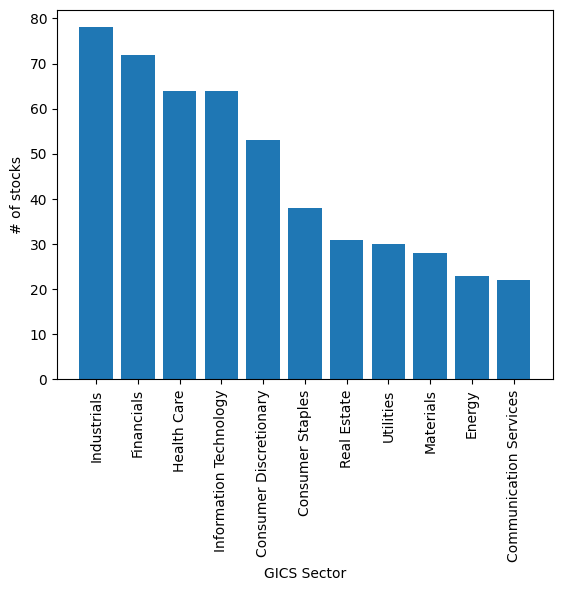

<Figure size 800x600 with 0 Axes>

In [ ]:
##Quick EDA on the GICS sector distribution

sectors_counts = sp_df["GICS Sector"].value_counts()
plt.bar(sectors_counts.index, sectors_counts.values)
plt.xticks(rotation=90)
plt.xlabel("GICS Sector")
plt.ylabel("# of stocks")
plt.figure(figsize=(8,6))
plt.show()

In [ ]:
#creating lists of tickers/symbols for each sector
industrials = sp_df.where(sp_df['GICS Sector'] == 'Industrials')['Symbol'].dropna().values.tolist()
financials = sp_df.where(sp_df['GICS Sector'] == 'Financials')['Symbol'].dropna().values.tolist()
healthcare = sp_df.where(sp_df['GICS Sector'] == 'Health Care')['Symbol'].dropna().values.tolist()
infotech = sp_df.where(sp_df['GICS Sector'] == 'Information Technology')['Symbol'].dropna().values.tolist()
consdisc = sp_df.where(sp_df['GICS Sector'] == 'Consumer Discretionary')['Symbol'].dropna().values.tolist()
consstap = sp_df.where(sp_df['GICS Sector'] == 'Consumer Staples')['Symbol'].dropna().values.tolist()
realestate = sp_df.where(sp_df['GICS Sector'] == 'Real Estate')['Symbol'].dropna().values.tolist()
utilities = sp_df.where(sp_df['GICS Sector'] == 'Utilities')['Symbol'].dropna().values.tolist()
materials = sp_df.where(sp_df['GICS Sector'] == 'Materials')['Symbol'].dropna().values.tolist()
energy = sp_df.where(sp_df['GICS Sector'] == 'Energy')['Symbol'].dropna().values.tolist()
comms = sp_df.where(sp_df['GICS Sector'] == 'Communication Services')['Symbol'].dropna().values.tolist()

In [ ]:
# Function to calculate average annual return for a list of tickers
def calculate_average_annual_return(sp500_tickers):
    start_date = "2000-01-01"  # 23 year period since 2000
    end_date = "2023-12-29"
    annual_returns = []

    for ticker in sp500_tickers:
        # Fetch historical data
        data = yf.download(ticker, start=start_date, end=end_date)

        # Calculate annual return
        if not data.empty:
            total_return = data['Adj Close'][-1] / data['Adj Close'][0] - 1
            annual_return = (1 + total_return) ** (1/23) - 1  # Compound annual growth rate (CAGR) for 23 year period
            annual_returns.append(annual_return)

    # Return the average annual return for the sector
    return np.mean(annual_returns) if annual_returns else None

# Calculate average annual return for each sector
industrials_avg_return = calculate_average_annual_return(industrials)
financials_avg_return = calculate_average_annual_return(financials)
healthcare_avg_return = calculate_average_annual_return(healthcare)
infotech_avg_return = calculate_average_annual_return(infotech)
consdisc_avg_return = calculate_average_annual_return(consdisc)
consstap_avg_return = calculate_average_annual_return(consstap)
realestate_avg_return = calculate_average_annual_return(realestate)
utilities_avg_return = calculate_average_annual_return(utilities)
materials_avg_return = calculate_average_annual_return(materials)
energy_avg_return = calculate_average_annual_return(energy)
comms_avg_return = calculate_average_annual_return(comms)


In [ ]:

# Print the results
print("Industrials Average Return:", industrials_avg_return)
print("Financials Average Return:", financials_avg_return)
print("Health Care Average Return:", healthcare_avg_return)
print("Information Technology Average Return:", infotech_avg_return)
print("Consumer Discretionary Average Return:", consdisc_avg_return)
print("Consuer Staple Average Return:", consstap_avg_return)
print("Real Estate Average Return:", realestate_avg_return)
print("Utilities Average Return:", utilities_avg_return)
print("Materials Average Return:", materials_avg_return)
print("Energy Average Return:", energy_avg_return)
print("Communication Servicves Average Return:", comms_avg_return)



Industrials Average Return: 0.11684917413524411
Financials Average Return: 0.09492399271582315
Health Care Average Return: 0.12421460449015956
Information Technology Average Return: 0.11082758661338504
Consumer Discretionary Average Return: 0.1221612748537105
Consuer Staple Average Return: 0.09247324163269578
Real Estate Average Return: 0.10839956804121399
Utilities Average Return: 0.09070954964098915
Materials Average Return: 0.09678391639672623
Energy Average Return: 0.09630155256957378
Communication Servicves Average Return: 0.07179916894459758


Based on the average returns from 2000 to 2023, discuss the performance of the stocks in different sectors.
